# 18АС | Пигасин Дмитрий | 6 Вариант

Установка Keras Tuner

In [1]:
!pip install -U keras-tuner

Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.1)


Импорт модулей

In [2]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from kerastuner.tuners import Hyperband
import IPython

Загрузка данных с GDrive

In [3]:
data = pd.read_csv('/content/drive/My Drive/data_analysis/lab1/train.csv')
data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,D,D,E,C,A,P,F,C,C,A,E,F,H,F,B,BI,DM,A,W,AF,A,K,DJ,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,C,D,C,E,C,D,T,L,J,A,A,K,G,F,J,K,BI,AI,A,AS,AJ,A,O,MD,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


## Подготовка данных

### Разбиение на отдельные таблицы для дальнейшей нормализации

In [4]:
data_cat = data.get([f'cat{i}' for i in range(1, 117)])
data_cont = data.get([f'cont{i}' for i in range(1, 15)])
data_loss = data.get('loss')
del data

In [5]:
data_cat

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,C,B,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK
188314,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,B,D,D,B,A,C,B,B,B,A,A,A,A,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF
188315,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,D,B,C,B,A,C,B,B,B,A,A,A,B,H,D,D,D,E,C,A,P,F,C,C,A,E,F,H,F,B,BI,DM,A,W,AF,A,K,DJ
188316,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,D,B,A,D,D,A,B,C,B,D,B,A,A,A,A,A,C,D,C,E,C,D,T,L,J,A,A,K,G,F,J,K,BI,AI,A,AS,AJ,A,O,MD


In [6]:
data_cont

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216
188314,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872
188315,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888
188316,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707


In [7]:
data_loss

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

Оценка разброса значений

In [8]:
data_loss_sorted = list(data_loss.sort_values())
print(f'top 10 min {data_loss_sorted[:10]}\ntop 10 max {data_loss_sorted[:-10:-1]}')
del data_loss_sorted

top 10 min [0.67, 5.25, 6.0, 8.4, 10.0, 11.0, 20.11, 20.99, 21.0, 23.69]
top 10 max [121012.25, 106863.0, 85923.56, 79623.52, 67667.16, 67537.73, 59826.79, 57224.55, 54190.39]


### Нормализация данных

Категориальные данные

In [9]:
data_cat_label = pd.DataFrame()
label_encoder = LabelEncoder()

for i in range(1,117):
  data_cat_label[f'cat{i}'] = label_encoder.fit_transform(data_cat[f'cat{i}'])

data_cat_norm = (data_cat_label - data_cat_label.mean()) / data_cat_label.std()

del data_cat
del data_cat_label

In [10]:
data_cat_norm

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,-0.574802,1.143633,-0.240848,1.463781,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,-0.418834,2.890349,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,0.06144,-0.024745,-0.343780,0.599156,0.448875,-0.156687,2.758342,0.396722,-0.04648,1.221871,-0.320404,-0.338597,-0.150755,-0.230187,-0.573062,-0.710736,0.462592,-1.511842,-0.764084,0.121602,-1.370707,0.506055,0.749216,-1.938721,0.899014,-0.224837,-0.566816,1.051490,-0.665439,-0.370787,0.920648,0.408493,1.126878,-1.556937,0.449649,-0.380008,1.224960,-0.542895,0.891654,1.578088
1,-0.574802,1.143633,-0.240848,-0.683159,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,2.387569,-0.345977,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,-0.442817,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,0.06144,-0.024745,-0.343780,0.599156,0.448875,-1.565603,-0.079072,0.396722,-0.04648,1.221871,-0.320404,-0.338597,-0.150755,-0.230187,-0.573062,-0.710736,0.462592,0.690767,-0.764084,0.121602,0.878977,1.184413,0.749216,1.064358,0.638047,-0.224837,-0.566816,-0.678551,-0.665439,0.767442,1.377035,1.507751,0.173802,-0.297037,-0.566973,-0.148451,0.348318,-0.542895,0.891654,-0.909695
2,-0.574802,1.143633,-0.240848,-0.683159,1.384192,-0.655725,-0.157776,-0.249597,1.226521,2.387569,2.890349,2.368384,2.945107,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,-0.442817,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,2.209976,-0.369188,-0.334935,-0.163874,-0.213353,...,0.06144,-0.024745,-0.343780,-1.682187,0.448875,-0.156687,2.758342,0.396722,-0.04648,-0.844023,-0.320404,-0.338597,-0.150755,-0.230187,-0.573062,-0.710736,0.462592,0.690767,-0.764084,0.121602,0.878977,-0.850662,-3.387671,1.064358,2.986755,-0.224837,0.311456,-0.678551,0.191035,0.198328,-0.904900,-1.240393,-2.288311,0.383990,-0.566973,0.314664,-1.353398,-0.542895,-1.546435,0.009703
3,1.739720,1.143633,-0.240848,1.463781,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,-0.418834,-0.345977,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,0.06144,-0.024745,-0.343780,0.599156,0.448875,2.661145,-0.079072,0.396722,-0.04648,1.221871,-0.320404,-0.338597,-0.150755,-0.230187,-0.573062,-0.710736,0.462592,0.690767,-0.764084,0.121602,0.878977,1.184413,0.749216,0.163434,0.116112,-0.224837,-0.566816,-0.678551,-0.665439,0.767442,1.377035,1.507751,0.173802,-0.228935,0.449649,1.163707,-1.404965,-0.542895,0.891654,-0.990818
4,-0.574802,1.143633,-0.240848,1.463781,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,2.387569,-0.345977,2.368384,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,.

Числовые данные

In [11]:
data_cont_norm = (data_cont - data_cont.mean()) / data_cont.std()
del data_cont

In [12]:
data_cont_norm

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1.238747,-1.260932,-1.540467,1.409549,-0.848536,1.107905,-0.840068,-0.922089,1.023029,1.813213,0.363475,0.484635,1.547888,0.984891
1,-0.870535,1.109448,0.463931,0.578922,1.906005,-0.253456,-0.271141,0.573970,-0.738942,-0.316747,-0.739971,-0.605670,0.555949,-0.859468
2,-1.236518,-0.718475,-0.072846,-1.206331,-0.432283,-0.980630,-0.949426,-1.069553,-1.237180,-0.933984,-0.534542,-0.571687,-1.397840,1.252690
3,-0.918073,0.234523,0.143849,-0.558451,-0.311729,-0.243576,-0.525873,-0.845047,-0.904030,-0.287265,-0.789543,-0.819287,0.526087,0.480589
4,-1.175960,-1.675654,0.143849,-0.088079,1.037380,-1.523591,-1.331252,-1.207788,-1.456656,-1.537394,-1.377080,-1.389209,-1.161433,-0.283661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,-0.780528,1.344562,0.567733,-0.088079,2.163016,-1.210622,-1.092861,-1.207788,-0.973886,-0.907676,-1.289585,-1.304263,-0.751235,-1.292212
188314,0.073543,0.234523,0.251610,1.472272,1.037380,-0.763251,-0.577025,0.743905,-0.445647,-0.109082,-0.886269,-0.913109,-0.820067,-0.853284
188315,-0.050055,1.344562,1.452018,-1.432496,-0.023881,-0.706678,-0.641278,-1.207788,-0.150976,-0.109082,-0.228368,-0.237680,-0.723262,0.036726
188316,-0.295653,-0.410187,-0.989297,-0.512959,-0.702708,1.039688,0.436513,-0.684993,-0.208281,0.219200,1.761930,1.717616,0.759552,1.015742


Склейка обработанных таблиц воедино

In [13]:
data = pd.concat([data_cat_norm, data_cont_norm, data_loss], axis=1)
del data_cat_norm
del data_cont_norm
del data_loss
data

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,-0.574802,1.143633,-0.240848,1.463781,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,-0.418834,2.890349,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,-0.710736,0.462592,-1.511842,-0.764084,0.121602,-1.370707,0.506055,0.749216,-1.938721,0.899014,-0.224837,-0.566816,1.051490,-0.665439,-0.370787,0.920648,0.408493,1.126878,-1.556937,0.449649,-0.380008,1.224960,-0.542895,0.891654,1.578088,1.238747,-1.260932,-1.540467,1.409549,-0.848536,1.107905,-0.840068,-0.922089,1.023029,1.813213,0.363475,0.484635,1.547888,0.984891,2213.18
1,-0.574802,1.143633,-0.240848,-0.683159,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,2.387569,-0.345977,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,-0.442817,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,-0.710736,0.462592,0.690767,-0.764084,0.121602,0.878977,1.184413,0.749216,1.064358,0.638047,-0.224837,-0.566816,-0.678551,-0.665439,0.767442,1.377035,1.507751,0.173802,-0.297037,-0.566973,-0.148451,0.348318,-0.542895,0.891654,-0.909695,-0.870535,1.109448,0.463931,0.578922,1.906005,-0.253456,-0.271141,0.573970,-0.738942,-0.316747,-0.739971,-0.605670,0.555949,-0.859468,1283.60
2,-0.574802,1.143633,-0.240848,-0.683159,1.384192,-0.655725,-0.157776,-0.249597,1.226521,2.387569,2.890349,2.368384,2.945107,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,-0.442817,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,2.209976,-0.369188,-0.334935,-0.163874,-0.213353,...,-0.710736,0.462592,0.690767,-0.764084,0.121602,0.878977,-0.850662,-3.387671,1.064358,2.986755,-0.224837,0.311456,-0.678551,0.191035,0.198328,-0.904900,-1.240393,-2.288311,0.383990,-0.566973,0.314664,-1.353398,-0.542895,-1.546435,0.009703,-1.236518,-0.718475,-0.072846,-1.206331,-0.432283,-0.980630,-0.949426,-1.069553,-1.237180,-0.933984,-0.534542,-0.571687,-1.397840,1.252690,3005.09
3,1.739720,1.143633,-0.240848,1.463781,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,-0.418834,-0.345977,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,-0.710736,0.462592,0.690767,-0.764084,0.121602,0.878977,1.184413,0.749216,0.163434,0.116112,-0.224837,-0.566816,-0.678551,-0.665439,0.767442,1.377035,1.507751,0.173802,-0.228935,0.449649,1.163707,-1.404965,-0.542895,0.891654,-0.990818,-0.918073,0.234523,0.143849,-0.558451,-0.311729,-0.243576,-0.525873,-0.845047,-0.904030,-0.287265,-0.789543,-0.819287,0.526087,0.480589,939.85
4,-0.574802,1.143633,-0.240848,1.463781,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,2.387569,-0.345977,2.368384,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.2133

### Разбиение на обучающую и тестовую выборки

In [14]:
split = 0.7
random_seed = 200

y_data = data.get('loss')
x_data = data.drop(['loss'], axis=1)
del data

x_train = x_data.sample(frac=split, random_state=random_seed)
x_test = x_data.drop(x_train.index)

y_train = y_data.sample(frac=split, random_state=random_seed)
y_test = y_data.drop(y_train.index)

del x_data
del y_data

Просмотр тренировочных данных

In [15]:
x_train

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
35320,-0.574802,1.143633,4.151980,-0.683159,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,2.387569,2.890349,2.368384,2.945107,-0.110631,-0.013438,5.299407,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,-0.442817,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,-0.573062,-0.710736,0.462592,-1.511842,-0.764084,0.121602,-1.370707,0.506055,0.749216,1.064358,3.247722,-0.224837,-0.566816,1.484000,0.191035,-0.370787,-0.448513,0.408493,0.173802,1.099068,-0.566973,-1.537794,0.915557,-0.542895,0.485306,1.632170,2.128386,-1.675654,-1.078577,1.050866,-0.986882,0.851987,-0.601911,1.370327,2.467925,1.558206,1.041454,1.057142,1.214272,1.336758
11967,1.739720,1.143633,-0.240848,1.463781,-0.722439,-0.655725,-0.157776,-0.249597,1.226521,2.387569,2.890349,2.368384,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,-0.213353,...,0.403730,-0.710736,0.462592,0.690767,0.583486,0.121602,-0.245865,-0.850662,-0.137260,0.463742,2.464820,-0.224837,-0.566816,-0.678551,0.191035,-0.370787,-0.448513,-0.415950,0.173802,1.269324,0.449649,0.469035,0.709289,-0.542895,-0.733739,-0.017338,-1.050054,-1.484951,0.669483,-1.307811,-0.986882,-0.601535,0.435151,-0.896609,-0.456822,-1.136753,-0.481609,-0.520227,-1.016366,1.449636
16312,-0.574802,1.143633,-0.240848,-0.683159,1.384192,-0.655725,-0.157776,-0.249597,1.226521,-0.418834,-0.345977,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,-0.442817,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,2.985638,-0.163874,-0.213353,...,-0.084666,-0.710736,-1.792974,-1.511842,1.931056,0.121602,2.003820,1.862772,0.158232,0.163434,-0.144856,-0.224837,0.311456,0.618979,-0.665439,-0.370787,0.464261,0.133679,0.173802,0.792606,-0.566973,0.854964,1.224960,-0.542895,0.078957,0.523484,0.765069,-0.410187,-1.078577,1.274996,1.002519,0.757644,-0.414279,0.190914,0.898511,1.578057,-0.006251,0.034530,0.925082,-0.486221
97332,-0.574802,-0.874402,-0.240848,1.463781,1.384192,-0.655725,-0.157776,-0.249597,-0.815310,-0.418834,-0.345977,-0.422227,-0.339544,-0.110631,-0.013438,-0.188699,-0.083664,-0.072586,-0.098457,-0.032931,-0.046882,-0.015113,2.258260,-0.186668,3.043529,3.976874,2.895505,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,-0.163874,4.687035,...,-0.573062,-0.710736,0.462592,0.690767,0.583486,0.121602,-0.245865,-0.850662,-0.137260,1.965282,-0.666791,-0.224837,2.946274,0.186469,2.760456,-0.370787,-0.904900,-0.415950,0.173802,-1.012115,2.991205,-0.611565,-1.301831,-0.542895,-0.733739,0.496443,-0.265174,1.109448,1.815854,-1.274743,-0.986882,-0.095812,1.116249,-0.602282,0.102905,-0.800454,1.716716,1.717616,-0.820067,-0.624201
41478,-0.574802,1.143633,4.151980,-0.683159,-0.722439,-0.655725,6.338075,4.006436,-0.815310,-0.418834,-0.345977,-0.422227,-0.339544,9.039027,-0.013438,-0.188699,11.952542,-0.072586,10.156655,-0.032931,-0.046882,-0.015113,-0.442817,-0.186668,-0.328564,-0.251452,-0.345361,-0.201958,-0.142054,-0.138771,-0.170799,-0.08045,-0.071469,-0.055774,-0.03365,-0.452491,-0.369188,-0.334935,

In [16]:
y_train

35320     5667.98
11967     6668.04
16312      720.40
97332     5361.27
41478      867.82
           ...   
130089     608.43
146720    2527.17
54392      641.47
172723    3532.58
22367     2974.41
Name: loss, Length: 131823, dtype: float64

## Тест предобученной модели

In [17]:
model = keras.models.load_model('/content/drive/My Drive/data_analysis/lab1/model_cat_norm_mae_1175.h5')
mae = model.evaluate(x_test, y_test, verbose=0)[1]
print(f'Средняя абсолютная ошибка = {mae}')

Средняя абсолютная ошибка = 1175.4111328125


## Создание нейронной сети

Описание модели

In [18]:
def build_model(hp):
  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])
  hidden_layers_choice = hp.Choice('hidden_layers', values=[0, 1, 2])

  model = Sequential()
  model.add(
      Dense(
          units=hp.Int(
              'input_units',
              min_value=128, 
              max_value=256, 
              step=16,
          ), 
          input_dim=x_train.shape[1], 
          activation=activation_choice,
      ),
  )
  model.add(Dropout(0.25))
  for i in range(hidden_layers_choice):
    model.add(
        Dense(
            units=hp.Int(
                f'layer_{i + 1}_units',
                min_value=64 // (i + 1),
                max_value=128 // (i + 1),
                step=8 // (i + 1),
            ),
            activation=activation_choice
        )
    )
  model.add(Dense(1))

  model.compile(
      optimizer='adam', 
      loss='mae',
      metrics=['mae'], 
  )

  return model

Создание тюнера

In [19]:
tuner = Hyperband(
    build_model,
    objective='mae', 
    max_epochs=10,
    directory='models',
    project_name='lab1',
)

INFO:tensorflow:Reloading Oracle from existing project models/lab1/oracle.json
INFO:tensorflow:Reloading Tuner from models/lab1/tuner0.json


In [20]:
tuner.search_space_summary()

Callback для очистки результатов в конце каждого шага обучения

In [21]:
class ClearTrainingOutput(Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

Поиск оптимальных гиперпараметров

In [22]:
tuner.search(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=2,
    callbacks = [ClearTrainingOutput()],
)

INFO:tensorflow:Oracle triggered exit


Создание модели на основе найденных гиперпараметров

In [33]:
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 208)               27248     
_________________________________________________________________
dropout (Dropout)            (None, 208)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               25080     
_________________________________________________________________
dense_2 (Dense)              (None, 44)                5324      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 45        
Total params: 57,697
Trainable params: 57,697
Non-trainable params: 0
_________________________________________________________________


In [34]:
fit_history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/25
3296/3296 - 8s - loss: 1340.3341 - mae: 1340.3341 - val_loss: 1242.6692 - val_mae: 1242.6692
Epoch 2/25
3296/3296 - 8s - loss: 1240.6223 - mae: 1240.6223 - val_loss: 1232.5383 - val_mae: 1232.5383
Epoch 3/25
3296/3296 - 8s - loss: 1223.6141 - mae: 1223.6141 - val_loss: 1219.5485 - val_mae: 1219.5485
Epoch 4/25
3296/3296 - 8s - loss: 1212.5786 - mae: 1212.5786 - val_loss: 1208.3392 - val_mae: 1208.3392
Epoch 5/25
3296/3296 - 8s - loss: 1204.3622 - mae: 1204.3622 - val_loss: 1216.4139 - val_mae: 1216.4139
Epoch 6/25
3296/3296 - 8s - loss: 1199.2324 - mae: 1199.2324 - val_loss: 1201.2802 - val_mae: 1201.2802
Epoch 7/25
3296/3296 - 8s - loss: 1192.5618 - mae: 1192.5618 - val_loss: 1195.8208 - val_mae: 1195.8208
Epoch 8/25
3296/3296 - 8s - loss: 1188.2466 - mae: 1188.2466 - val_loss: 1198.3750 - val_mae: 1198.3750
Epoch 9/25
3296/3296 - 8s - loss: 1185.6337 - mae: 1185.6337 - val_loss: 1196.3795 - val_mae: 1196.3795
Epoch 10/25
3296/3296 - 8s - loss: 1181.8555 - mae: 1181.8555 - 

## Оценка результатов обучения

In [25]:
def draw_graphics(fit_history):
    history = fit_history.history
    epochs = range(1, len(history['loss']) + 1)
    mae = history['mae']
    val_mae = history['val_mae']
    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

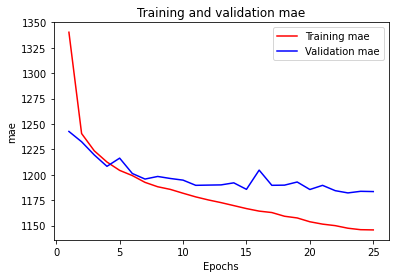

In [35]:
draw_graphics(fit_history)

In [36]:
mae = model.evaluate(x_test, y_test, verbose=0)[1]
print(f'Средняя абсолютная ошибка = {mae}')

Средняя абсолютная ошибка = 1174.9923095703125


Топ Kaggle   
https://www.kaggle.com/c/allstate-claims-severity/leaderboard

Сохранение модели

In [37]:
model.save(f'/content/drive/My Drive/data_analysis/lab1/model_cat_norm_mae_{int(mae)}.h5')